In [1]:
import pandas as pd

In [2]:
# Load the data
file_path = 'dodgers-2022.csv'
dodgers_data = pd.read_csv(file_path)

# print first 5 rows of the data
dodgers_data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


I want to check out how special events or promotions affect attendance. I am also concerned that if some don't have enough events that we can't be sure if they are significant enough.

In [7]:
# get count of games with cap = YES
cap_yes = dodgers_data[dodgers_data['cap'] == 'YES'].shape[0]

# get count of games with cap = NO
cap_no = dodgers_data[dodgers_data['cap'] == 'NO'].shape[0]

# print the counts
print('Number of games with cap = YES:', cap_yes)
print('Number of games with cap = NO:', cap_no)

Number of games with cap = YES: 2
Number of games with cap = NO: 79


In [8]:
# get count of games with shirt = YES
shirt_yes = dodgers_data[dodgers_data['shirt'] == 'YES'].shape[0]

# get count of games with shirt = NO
shirt_no = dodgers_data[dodgers_data['shirt'] == 'NO'].shape[0]

# print the counts
print('Number of games with shirt = YES:', shirt_yes)
print('Number of games with shirt = NO:', shirt_no)

Number of games with shirt = YES: 3
Number of games with shirt = NO: 78


In [9]:
# get count of games with fireworks = YES
fireworks_yes = dodgers_data[dodgers_data['fireworks'] == 'YES'].shape[0]

# get count of games with shirt = NO
fireworks_no = dodgers_data[dodgers_data['fireworks'] == 'NO'].shape[0]

# print the counts
print('Number of games with fireworks = YES:', fireworks_yes)
print('Number of games with fireworks = NO:', fireworks_no)

Number of games with fireworks = YES: 14
Number of games with fireworks = NO: 67


In [10]:
# get count of games with bobblehead = YES
bobblehead_yes = dodgers_data[dodgers_data['bobblehead'] == 'YES'].shape[0]

# get count of games with shirt = NO
bobblehead_no = dodgers_data[dodgers_data['bobblehead'] == 'NO'].shape[0]

# print the counts
print('Number of games with bobblehead = YES:', bobblehead_yes)
print('Number of games with bobblehead = NO:', bobblehead_no)

Number of games with bobblehead = YES: 11
Number of games with bobblehead = NO: 70


I feel like fireworks and bobbleheads are the two best things to explore more. 

In [3]:
# Group by bobblehead promotion status and calculate the average attendance
bobblehead_analysis = dodgers_data.groupby('bobblehead')['attend'].mean().reset_index()
print(bobblehead_analysis)


  bobblehead        attend
0         NO  39137.928571
1        YES  53144.636364


In [14]:
import statsmodels.api as sm

# Create a binary variable for bobblehead promotion
dodgers_data['bobblehead_promotion'] = dodgers_data['bobblehead'].apply(lambda x: 1 if x == 'YES' else 0)

# Define the independent and depenend variables
X = dodgers_data['bobblehead_promotion']
y = dodgers_data['attend']

# Add a constant
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Results
regression_results = model.summary()
regression_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     40.44
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.22e-08
Time:                        21:07:18   Log-Likelihood:                -828.61
No. Observations:                  81   AIC:                             1661.
Df Residuals:                      79   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.914e+04    811.640     48.221      0.000    3.75e+04    4.08e+04
bobblehead_promotion  1.401e+04   2202.467      6.360      0.000    9622.807    1.84e+04
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.436
Skew:                           0.180   Prob(JB):                        0.804
Kurtosis:                       2.995   Cond. No.                         2.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems like the the bobblehead promotion has a big impact on attendance. 

In [11]:
# Group by fireworks promotion status and calculate the average attendance
fireworks_analysis = dodgers_data.groupby('fireworks')['attend'].mean().reset_index()
print(fireworks_analysis)

  fireworks        attend
0        NO  41032.179104
1       YES  41077.857143


It doesn't seem that fireworks have any impact on attendance.

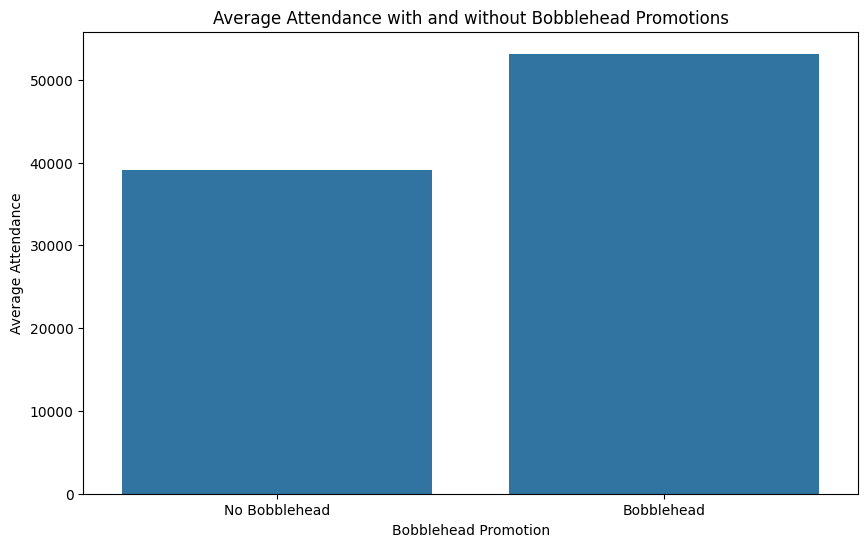

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the average attendance with and without bobblehead promotions
plt.figure(figsize=(10, 6))
sns.barplot(x='bobblehead', y='attend', data=bobblehead_analysis)
plt.xlabel('Bobblehead Promotion')
plt.ylabel('Average Attendance')
plt.title('Average Attendance with and without Bobblehead Promotions')
plt.xticks([0, 1], ['No Bobblehead', 'Bobblehead'])
plt.show()


My recommendation to the management would be to do more promotions with bobbleheads and explore other products like the caps and shirts more, but they may need to run those promotions more to get more data to find out the impact or at least do a survey with attendees.